## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1))(x)
        x = BatchNormalization()(x)
    
    out = keras.layers.Dense(output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.3, 0.1, 0.01]
redice_lr_patient = [10, 20, 30]

In [10]:
import itertools
from keras.callbacks import ReduceLROnPlateau
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=0.5,
                                  min_lr=1e-12,
                                  monitor='val_loss',
                                  patience=5,
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.30, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

50000/50000 [==============================] - 4s 81us/step - loss: 1.2800 - acc: 0.5542 - val_loss: 1.4808 - val_acc: 0.4812
Epoch 14/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.2579 - acc: 0.5622 - val_loss: 1.4682 - val_acc: 0.4856
Epoch 15/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.2380 - acc: 0.5692 - val_loss: 1.4597 - val_acc: 0.4865
Epoch 16/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.2195 - acc: 0.5765 - val_loss: 1.4527 - val_acc: 0.4926
Epoch 17/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.1997 - acc: 0.5844 - val_loss: 1.4639 - val_acc: 0.4907
Epoch 18/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.1799 - acc: 0.5896 - val_loss: 1.4370 - val_acc: 0.4938
Epoch 19/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.1614 - acc: 0.5991 - val_loss: 1.4427 - val_acc: 0.4998
Epoch 20/25
50000/50000 [=====================

50000/50000 [==============================] - 5s 99us/step - loss: 2.2333 - acc: 0.2661 - val_loss: 2.1622 - val_acc: 0.2967
Epoch 2/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.7677 - acc: 0.3829 - val_loss: 1.8007 - val_acc: 0.3796
Epoch 3/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.6411 - acc: 0.4243 - val_loss: 1.7214 - val_acc: 0.4073
Epoch 4/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.5693 - acc: 0.4512 - val_loss: 1.6322 - val_acc: 0.4282
Epoch 5/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.5167 - acc: 0.4676 - val_loss: 1.6026 - val_acc: 0.4382
Epoch 6/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.4750 - acc: 0.4831 - val_loss: 1.5829 - val_acc: 0.4449
Epoch 7/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.4367 - acc: 0.4982 - val_loss: 1.5541 - val_acc: 0.4532
Epoch 8/25
50000/50000 [============================

50000/50000 [==============================] - 4s 76us/step - loss: 1.0672 - acc: 0.6348 - val_loss: 1.4606 - val_acc: 0.4937
Epoch 25/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.0514 - acc: 0.6409 - val_loss: 1.4526 - val_acc: 0.4990
Numbers of exp: 5, reduce_factor: 0.10, reduce_patient: 30
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

Epoch 12/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.2922 - acc: 0.5499 - val_loss: 1.4721 - val_acc: 0.4783
Epoch 13/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.2687 - acc: 0.5612 - val_loss: 1.4750 - val_acc: 0.4796
Epoch 14/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.2462 - acc: 0.5671 - val_loss: 1.4693 - val_acc: 0.4803
Epoch 15/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.2257 - acc: 0.5745 - val_loss: 1.4612 - val_acc: 0.4825
Epoch 16/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.2079 - acc: 0.5829 - val_loss: 1.4430 - val_acc: 0.4928
Epoch 17/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.1888 - acc: 0.5896 - val_loss: 1.4569 - val_acc: 0.4878
Epoch 18/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.1698 - acc: 0.5958 - val_loss: 1.4452 - val_acc: 0.4920
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 5s 104us/step - loss: 2.2752 - acc: 0.2603 - val_loss: 2.1590 - val_acc: 0.3072
Epoch 2/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.7573 - acc: 0.3899 - val_loss: 1.8514 - val_acc: 0.3676
Epoch 3/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.6325 - acc: 0.4305 - val_loss: 1.7048 - val_acc: 0.4026
Epoch 4/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.5574 - acc: 0.4552 - val_loss: 1.6545 - val_acc: 0.4109
Epoch 5/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.5081 - acc: 0.4712 - val_loss: 1.5901 - val_acc: 0.4362
Epoch 6/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.4638 - acc: 0.4872 - val_loss: 1.5746 - val_acc: 0.4455
Epoch 7/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.4258 - acc: 0.5006 - val_loss: 1.5508 - val_ac

50000/50000 [==============================] - 4s 81us/step - loss: 0.4679 - acc: 0.8655 - val_loss: 1.4765 - val_acc: 0.5330
Epoch 23/25
50000/50000 [==============================] - 4s 82us/step - loss: 0.4502 - acc: 0.8714 - val_loss: 1.5117 - val_acc: 0.5276
Epoch 24/25
50000/50000 [==============================] - 4s 83us/step - loss: 0.4387 - acc: 0.8771 - val_loss: 1.5128 - val_acc: 0.5315
Epoch 25/25
50000/50000 [==============================] - 4s 82us/step - loss: 0.4265 - acc: 0.8825 - val_loss: 1.5442 - val_acc: 0.5255
Numbers of exp: 10, reduce_factor: 0.30, reduce_patient: 20
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batc

50000/50000 [==============================] - 4s 82us/step - loss: 1.1824 - acc: 0.5921 - val_loss: 1.4860 - val_acc: 0.4791
Epoch 10/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.1552 - acc: 0.6030 - val_loss: 1.4612 - val_acc: 0.4874
Epoch 11/25
50000/50000 [==============================] - 4s 84us/step - loss: 1.1294 - acc: 0.6124 - val_loss: 1.4623 - val_acc: 0.4850
Epoch 12/25
50000/50000 [==============================] - 4s 88us/step - loss: 1.1034 - acc: 0.6216 - val_loss: 1.4485 - val_acc: 0.4856
Epoch 13/25
50000/50000 [==============================] - 4s 88us/step - loss: 1.0801 - acc: 0.6326 - val_loss: 1.4309 - val_acc: 0.4966
Epoch 14/25
50000/50000 [==============================] - 4s 86us/step - loss: 1.0588 - acc: 0.6390 - val_loss: 1.4754 - val_acc: 0.4874
Epoch 15/25
50000/50000 [==============================] - 4s 83us/step - loss: 1.0373 - acc: 0.6489 - val_loss: 1.4572 - val_acc: 0.4969
Epoch 16/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 118us/step - loss: 1.9738 - acc: 0.3282 - val_loss: 1.8668 - val_acc: 0.3598
Epoch 2/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.6204 - acc: 0.4324 - val_loss: 1.6920 - val_acc: 0.4089
Epoch 3/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.5231 - acc: 0.4661 - val_loss: 1.6501 - val_acc: 0.4140
Epoch 4/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.4628 - acc: 0.4877 - val_loss: 1.6262 - val_acc: 0.4213
Epoch 5/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.4172 - acc: 0.5073 - val_loss: 1.5653 - val_acc: 0.4496
Epoch 6/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.3813 - acc: 0.5178 - val_loss: 1.5538 - val_acc: 0.4460
Epoch 7/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.3490 - acc: 0.5302 - val_loss: 1.5432 - val_ac

50000/50000 [==============================] - 4s 84us/step - loss: 1.0655 - acc: 0.6395 - val_loss: 1.4371 - val_acc: 0.4945
Epoch 25/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.0555 - acc: 0.6431 - val_loss: 1.4427 - val_acc: 0.4943
Numbers of exp: 15, reduce_factor: 0.01, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizat

50000/50000 [==============================] - 4s 82us/step - loss: 1.4135 - acc: 0.5115 - val_loss: 1.5762 - val_acc: 0.4511
Epoch 12/25
50000/50000 [==============================] - 4s 83us/step - loss: 1.3972 - acc: 0.5181 - val_loss: 1.5644 - val_acc: 0.4542
Epoch 13/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.3827 - acc: 0.5221 - val_loss: 1.5545 - val_acc: 0.4570
Epoch 14/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.3673 - acc: 0.5287 - val_loss: 1.5518 - val_acc: 0.4605
Epoch 15/25
50000/50000 [==============================] - 4s 83us/step - loss: 1.3538 - acc: 0.5348 - val_loss: 1.5428 - val_acc: 0.4640
Epoch 16/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.3407 - acc: 0.5388 - val_loss: 1.5393 - val_acc: 0.4703
Epoch 17/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.3299 - acc: 0.5427 - val_loss: 1.5330 - val_acc: 0.4671
Epoch 18/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 123us/step - loss: 1.8339 - acc: 0.3691 - val_loss: 3.1428 - val_acc: 0.2484
Epoch 2/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.5353 - acc: 0.4571 - val_loss: 1.8846 - val_acc: 0.3627
Epoch 3/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.4247 - acc: 0.4962 - val_loss: 2.3210 - val_acc: 0.2924
Epoch 4/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.3448 - acc: 0.5226 - val_loss: 2.3201 - val_acc: 0.2980
Epoch 5/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.2841 - acc: 0.5459 - val_loss: 1.9527 - val_acc: 0.3748
Epoch 6/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.2236 - acc: 0.5683 - val_loss: 2.0498 - val_acc: 0.3488
Epoch 7/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.1741 - acc: 0.5835 - val_loss: 1.7402 - val_ac

Epoch 22/25
50000/50000 [==============================] - 4s 80us/step - loss: 0.8309 - acc: 0.7270 - val_loss: 1.4127 - val_acc: 0.5140
Epoch 23/25
50000/50000 [==============================] - 4s 79us/step - loss: 0.8210 - acc: 0.7297 - val_loss: 1.4221 - val_acc: 0.5153
Epoch 24/25
50000/50000 [==============================] - 4s 79us/step - loss: 0.8097 - acc: 0.7346 - val_loss: 1.4307 - val_acc: 0.5051

Epoch 00024: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 25/25
50000/50000 [==============================] - 4s 79us/step - loss: 0.7864 - acc: 0.7452 - val_loss: 1.4121 - val_acc: 0.5104
Numbers of exp: 20, reduce_factor: 0.30, reduce_patient: 30
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)   

50000/50000 [==============================] - 4s 81us/step - loss: 1.4911 - acc: 0.4808 - val_loss: 1.6566 - val_acc: 0.4252
Epoch 10/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.4626 - acc: 0.4929 - val_loss: 1.6259 - val_acc: 0.4350
Epoch 11/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.4371 - acc: 0.4994 - val_loss: 1.6094 - val_acc: 0.4406
Epoch 12/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.4147 - acc: 0.5061 - val_loss: 1.5952 - val_acc: 0.4499
Epoch 13/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.3922 - acc: 0.5165 - val_loss: 1.5811 - val_acc: 0.4475
Epoch 14/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.3731 - acc: 0.5209 - val_loss: 1.5822 - val_acc: 0.4463
Epoch 15/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.3520 - acc: 0.5283 - val_loss: 1.5620 - val_acc: 0.4533
Epoch 16/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s 133us/step - loss: 2.3061 - acc: 0.2484 - val_loss: 2.2005 - val_acc: 0.2876
Epoch 2/25
50000/50000 [==============================] - 4s 84us/step - loss: 1.9431 - acc: 0.3357 - val_loss: 1.9841 - val_acc: 0.3394
Epoch 3/25
50000/50000 [==============================] - 4s 84us/step - loss: 1.8018 - acc: 0.3775 - val_loss: 1.8743 - val_acc: 0.3708
Epoch 4/25
50000/50000 [==============================] - 4s 84us/step - loss: 1.7115 - acc: 0.4056 - val_loss: 1.8041 - val_acc: 0.3898
Epoch 5/25
50000/50000 [==============================] - 4s 84us/step - loss: 1.6496 - acc: 0.4261 - val_loss: 1.7627 - val_acc: 0.3955
Epoch 6/25
50000/50000 [==============================] - 4s 83us/step - loss: 1.5997 - acc: 0.4422 - val_loss: 1.7154 - val_acc: 0.4150
Epoch 7/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.5586 - acc: 0.4555 - val_loss: 1.6705 - val_ac

50000/50000 [==============================] - 4s 82us/step - loss: 1.2052 - acc: 0.5870 - val_loss: 1.5002 - val_acc: 0.4768
Epoch 25/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.1924 - acc: 0.5898 - val_loss: 1.5101 - val_acc: 0.4743
Numbers of exp: 25, reduce_factor: 0.01, reduce_patient: 20
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_76 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizat

Epoch 12/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.4200 - acc: 0.5043 - val_loss: 1.5906 - val_acc: 0.4428
Epoch 13/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.3965 - acc: 0.5131 - val_loss: 1.5702 - val_acc: 0.4472
Epoch 14/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.3756 - acc: 0.5226 - val_loss: 1.5669 - val_acc: 0.4480
Epoch 15/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.3567 - acc: 0.5294 - val_loss: 1.5514 - val_acc: 0.4537
Epoch 16/25
50000/50000 [==============================] - 4s 84us/step - loss: 1.3377 - acc: 0.5354 - val_loss: 1.5574 - val_acc: 0.4547
Epoch 17/25
50000/50000 [==============================] - 4s 83us/step - loss: 1.3202 - acc: 0.5406 - val_loss: 1.5354 - val_acc: 0.4617
Epoch 18/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.3041 - acc: 0.5486 - val_loss: 1.5381 - val_acc: 0.4654
Epoch 19/25
50000/50000 [=========

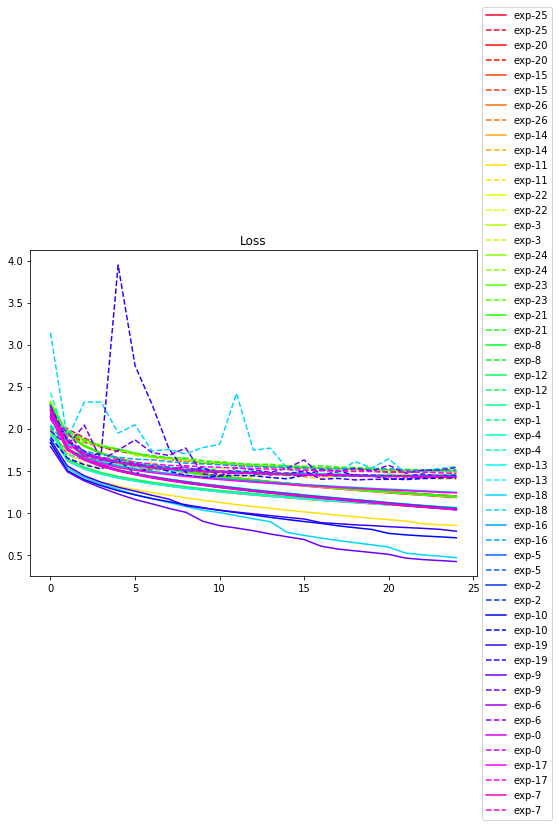

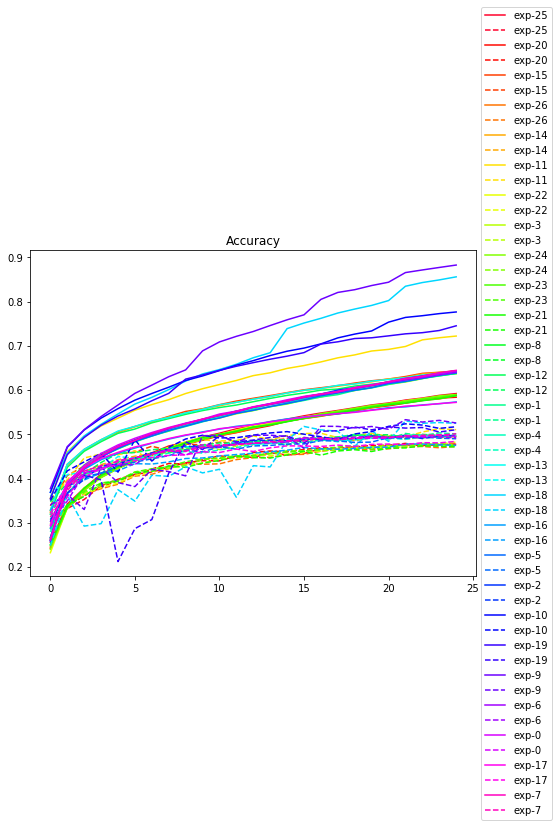

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()